#Carregar a Base de Dados Mnist

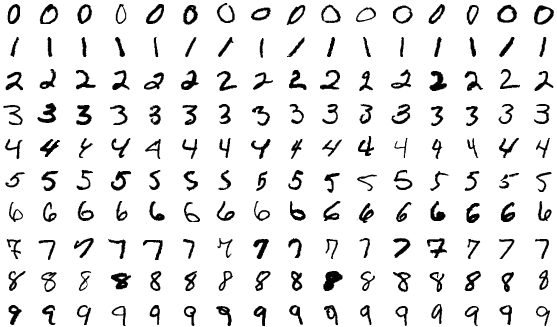

In [1]:
from keras.datasets import mnist

# Carregar dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Verificar as formas dos dados
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train labels shape: (60000,)
Test labels shape: (10000,)


In [2]:
from sklearn.model_selection import train_test_split

# Selecionar 10% dos conjuntos de forma estratificada
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.9, stratify=y_train, random_state=42)
x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0.9, stratify=y_test, random_state=42)

print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Train data shape: (6000, 28, 28)
Test data shape: (1000, 28, 28)
Train labels shape: (6000,)
Test labels shape: (1000,)


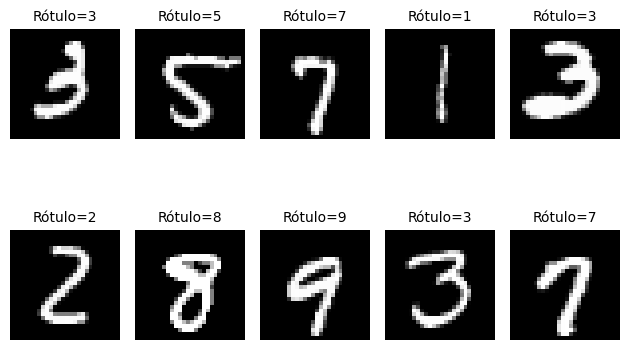

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
  image = x_test[i]
  true_label = y_test[i]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Rótulo={true_label}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

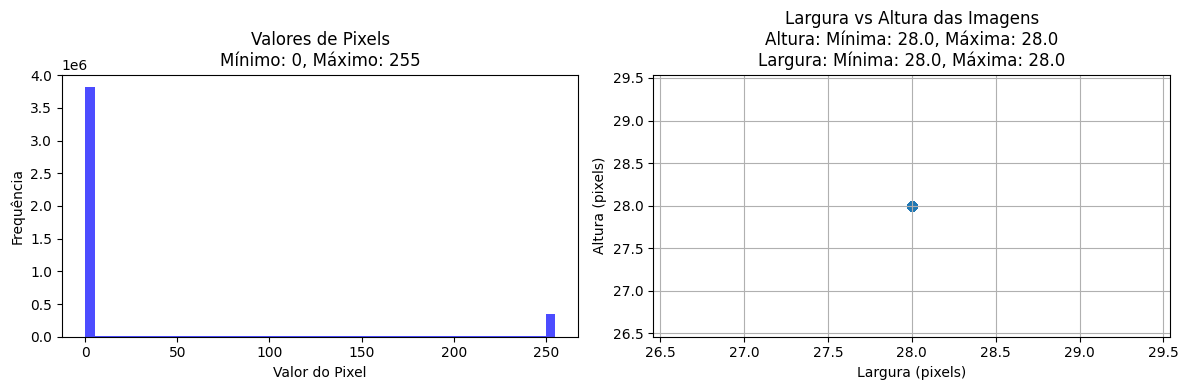

In [5]:
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(x_train)
pixel_max = np.max(x_train)

# Obter dimensões das imagens
image_heights = x_train.shape[1] * np.ones(x_train.shape[0])
image_widths = x_train.shape[2] * np.ones(x_train.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

- Todas as imagens são 8 bits: pixels variando de 0 a 255 (2**8 valores)
- Dimensão das imagens é a mesma: 28 x 28

#Análise das Imagens

In [6]:
train_unique_values, train_counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", train_unique_values)
print("Contagens:", train_counts)

Valores únicos: [0 1 2 3 4 5 6 7 8 9]
Contagens: [592 674 596 613 584 542 592 627 585 595]


In [7]:
test_unique_values, test_counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", test_unique_values)
print("Contagens:", test_counts)

Valores únicos: [0 1 2 3 4 5 6 7 8 9]
Contagens: [ 98 114 103 101  98  89  96 103  97 101]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

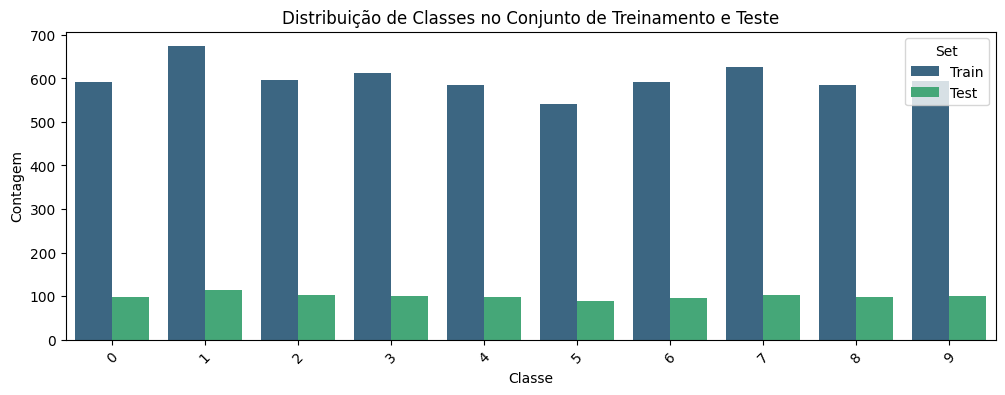

In [9]:
# Criar DataFrames para facilitar a plotagem com seaborn
train_df = pd.DataFrame({
    'Class': train_unique_values,
    'Count': train_counts,
    'Set': 'Train'
})

test_df = pd.DataFrame({
    'Class': test_unique_values,
    'Count': test_counts,
    'Set': 'Test'
})

# Combinar os DataFrames de treinamento e teste
combined_df = pd.concat([train_df, test_df])

# Plotar a distribuição das classes no conjunto de treinamento e teste
plt.figure(figsize=(12, 4))
sns.barplot(x='Class', y='Count', hue='Set', data=combined_df, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes no Conjunto de Treinamento e Teste')
plt.xticks(rotation=45)
plt.show()

Quase Perfeitamente Balanceado!

#Vetorizar as Imagens e Treinar um Modelo SVM
Para simplificar, vamos vetorizar os pixels das imagens. No entanto, para melhores resultados, a extração de atributos (como SIFT, HOG) pode ser utilizada.

In [10]:
x_train.shape

(6000, 28, 28)

In [11]:
# Vetorizar as imagens
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_train_flat.shape

(6000, 784)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train)

# Inferir
y_pred = svm.predict(x_test_flat)

Acurácia: 0.961
Kappa: 0.9566459048722221
F1 score: 0.9610650779699714


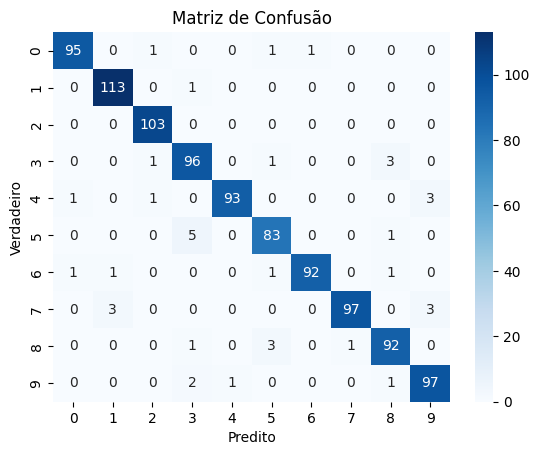

In [14]:
def evaluate(y_test, y_pred):

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('Kappa:', cohen_kappa_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Plotar matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

evaluate(y_test, y_pred)

##Análise dos Erros

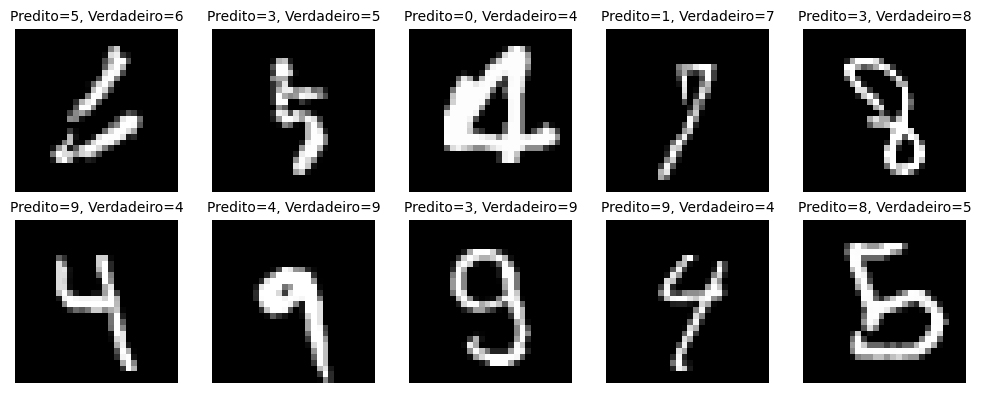

In [15]:
# Filtrar previsões incorretas
incorrect_indices = np.where(y_pred != y_test)[0]

# Se houver previsões incorretas, selecione até 10 para exibir
num_images_to_show = min(10, len(incorrect_indices))
if num_images_to_show > 0:
    plt.figure(figsize=(10, 4))
    for i in range(num_images_to_show):
        incorrect_index = incorrect_indices[i]
        incorrect_image = x_test[incorrect_index]
        true_label = y_test[incorrect_index]
        predicted_label = y_pred[incorrect_index]

        plt.subplot(2, 5, i + 1)
        plt.imshow(incorrect_image, cmap='gray')
        plt.title(f'Predito={predicted_label}, Verdadeiro={true_label}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma previsão incorreta encontrada.")

##Analisar Probabilities

In [16]:
# Criar DataFrame com informações das previsões incorretas
incorrect_predictions = []
probabilities = svm.predict_proba(x_test_flat)

for i in incorrect_indices:
    true_label = y_test[i]
    predicted_label = y_pred[i]
    row = {
        'indice': i,
        'true': true_label,
        'pred': predicted_label
    }
    # Adicionar as probabilidades para cada classe
    for class_index in range(10):
        row[f'proba_{class_index}'] = probabilities[i, class_index]
    incorrect_predictions.append(row)

df_incorrect_predictions = pd.DataFrame(incorrect_predictions)

# Exibir o DataFrame
df_incorrect_predictions.head(10)

,indice,true,pred,proba_0,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,45,6,5,0.089723,0.008662,0.024060,0.131821,0.001300,0.394754,0.343907,0.002091,0.002169,0.001513
1,48,5,3,0.000890,0.009950,0.002924,0.669715,0.049795,0.165126,0.005668,0.013930,0.045842,0.036159
2,56,4,0,0.600146,0.001947,0.066907,0.006072,0.076638,0.101386,0.111004,0.003161,0.012365,0.020373
3,61,7,1,0.003673,0.534852,0.031305,0.028005,0.002584,0.037165,0.001767,0.298983,0.025329,0.036337
4,69,8,3,0.006383,0.014241,0.097713,0.272077,0.136763,0.057769,0.010538,0.044529,0.137572,0.222415
5,95,4,9,0.000170,0.002374,0.000873,0.012235,0.294711,0.013862,0.000714,0.001544,0.009161,0.664356
6,125,9,4,0.000252,0.000516,0.000156,0.003219,0.569623,0.040330,0.000757,0.011571,0.001944,0.371633
7,142,9,3,0.021676,0.006849,0.023170,0.227818,0.025306,0.068555,0.006535,0.045608,0.229025,0.345458
8,180,4,9,0.000220,0.000443,0.000658,0.001780,0.201016,0.003975,0.000207,0.024538,0.001332,0.765831
9,183,5,8,0.000763,0.000606,0.025798,0.019390,0.000735,0.046855,0.007093,0.000170,0.897851,0.000740


In [17]:
# Aplica um gradiente de cores a todas as colunas a partir da quarta (índice 3)
styled_df = df_incorrect_predictions.head(10).style.background_gradient(cmap='Oranges', subset=df_incorrect_predictions.columns[3:])
styled_df

,indice,true,pred,proba_0,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,45,6,5,0.089723,0.008662,0.024060,0.131821,0.001300,0.394754,0.343907,0.002091,0.002169,0.001513
1,48,5,3,0.000890,0.009950,0.002924,0.669715,0.049795,0.165126,0.005668,0.013930,0.045842,0.036159
2,56,4,0,0.600146,0.001947,0.066907,0.006072,0.076638,0.101386,0.111004,0.003161,0.012365,0.020373
3,61,7,1,0.003673,0.534852,0.031305,0.028005,0.002584,0.037165,0.001767,0.298983,0.025329,0.036337
4,69,8,3,0.006383,0.014241,0.097713,0.272077,0.136763,0.057769,0.010538,0.044529,0.137572,0.222415
5,95,4,9,0.000170,0.002374,0.000873,0.012235,0.294711,0.013862,0.000714,0.001544,0.009161,0.664356
6,125,9,4,0.000252,0.000516,0.000156,0.003219,0.569623,0.040330,0.000757,0.011571,0.001944,0.371633
7,142,9,3,0.021676,0.006849,0.023170,0.227818,0.025306,0.068555,0.006535,0.045608,0.229025,0.345458
8,180,4,9,0.000220,0.000443,0.000658,0.001780,0.201016,0.003975,0.000207,0.024538,0.001332,0.765831
9,183,5,8,0.000763,0.000606,0.025798,0.019390,0.000735,0.046855,0.007093,0.000170,0.897851,0.000740


#Normalização das Imagens e Retreinamento

In [18]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [19]:
# Vetorizar as imagens
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

Acurácia: 0.961
Kappa: 0.9566459048722221
F1 score: 0.9610650779699714


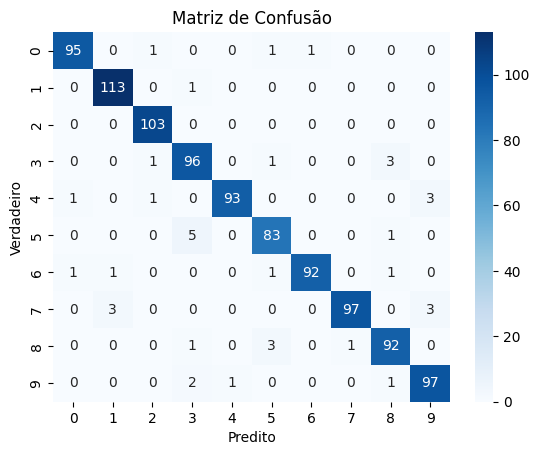

In [20]:
# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)

#PCA para Redução de Dimensionalidade e Retreinamento

In [21]:
from sklearn.decomposition import PCA

n_components = 100
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

pickle ou joblib: serializar o pca

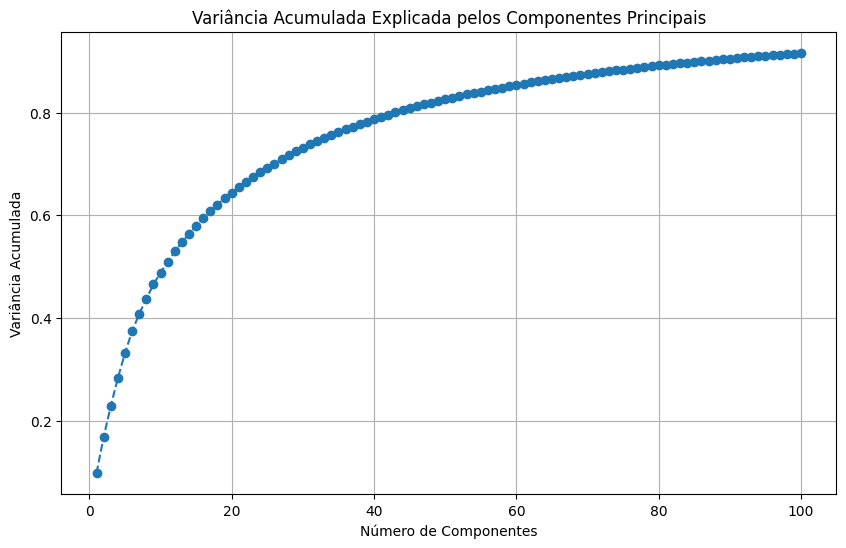

In [22]:
# Plotar variância acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Acumulada Explicada pelos Componentes Principais')
plt.grid(True)

Acurácia: 0.966
Kappa: 0.9622044163027915
F1 score: 0.9659952916344544


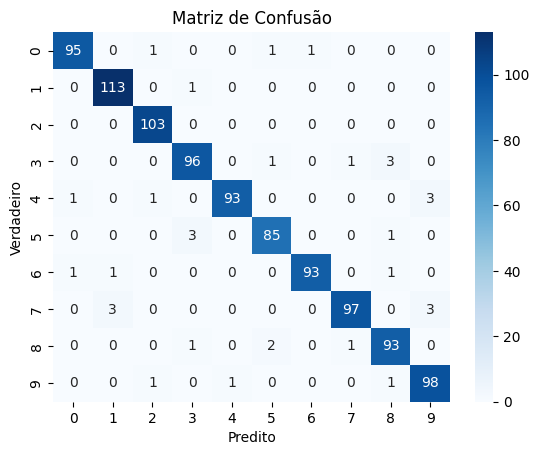

In [23]:
# Treinar o modelo SVM
x_train_flat = x_train_pca.reshape(x_train_pca.shape[0], -1)
x_test_flat = x_test_pca.reshape(x_test_pca.shape[0], -1)

svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)

#Aplicação de CLAHE (?) e Retreino

In [24]:
import cv2

# Função para aplicar CLAHE
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image)
    return image_clahe

# Aplicar CLAHE em um subconjunto de treinamento e teste para exemplo
x_train_clahe = np.array([apply_clahe(img) for img in x_train])
x_test_clahe = np.array([apply_clahe(img) for img in x_test])

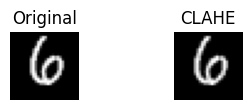

In [25]:
# Plotar a imagem original e a imagem com CLAHE aplicados lado a lado
plt.figure(figsize=(3, 3))
image_idx = 0  # Substitua pelo índice da imagem que deseja visualizar

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(x_train[image_idx], cmap='gray')
plt.title('Original')
plt.axis('off')

# Imagem com CLAHE aplicado
plt.subplot(1, 3, 3)
plt.imshow(x_train_clahe[image_idx], cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

Não faz sentido aplicar CLAHE em uma imagem binarizada (preto e branco).
CLAHE é uma técnica de processamento de imagem usada para melhorar o contraste em imagens em tons de cinza ou coloridas, especialmente em áreas locais da imagem (depende de uma variação contínua de níveis de intensidade para redistribuir o contraste em diferentes regiões da imagem).

Uma imagem binarizada já possui apenas dois valores de pixel (tipicamente 0 e 255), o que significa que o contraste já está maximizado e não há gradientes de intensidade para melhorar. Aplicar CLAHE em uma imagem binarizada não trará benefícios e pode introduzir artefatos ou ruído indesejável.

Acurácia: 0.964
Kappa: 0.9599815915321048
F1 score: 0.9640317487421942


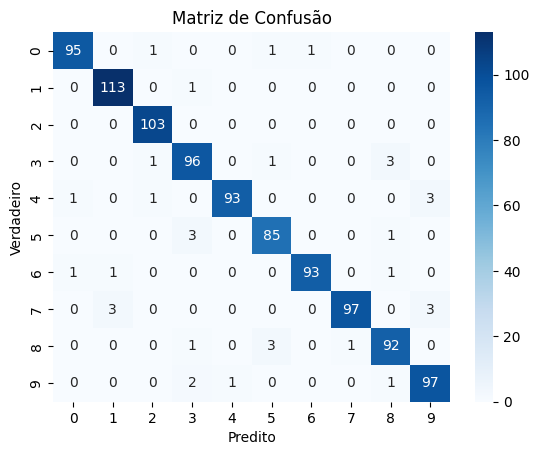

In [27]:
x_train_flat = x_train_clahe.reshape(x_train_clahe.shape[0], -1)
x_test_flat = x_test_clahe.reshape(x_test_clahe.shape[0], -1)

# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(x_train_flat, y_train.flatten())

# Fazer previsões e avaliar o modelo
y_pred = svm.predict(x_test_flat)
evaluate(y_test, y_pred)

Resultados muito parecidos. Pequenas diferenças podem acontecer devido a aleatoriedade do processo de treinamento.